#1. 데이터 불러오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
import pandas as pd

df = pd.read_csv('vgames2.csv')

df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#2. 데이터 탐색
- 2_1 데이터 결측치 처리
- 2_2 데이터 타입 변환( object -> float)

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

#2_1. 데이터 결측치 처리

In [ ]:
#Year컬럼값 중 4자리 숫자가 아닌 값들: NaN값으로 변경
#Year의 결측치(NaN) : 플랫폼 Platform 종류에 따라 Year값을 평균내어 채워넣음

import numpy as np

df.loc[df.Year < 1980,'Year'] = 0
df['Year'].replace(0, np.NaN, inplace = True)

In [ ]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
74,Age of Empires III: Complete Collection,PC,NaN,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,NaN,Action,Namco Bandai Games,0.1,0.07,0,0.01
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
213,NASCAR Unleashed,PS3,NaN,Racing,Activision,0.09,0,0,0.01
...,...,...,...,...,...,...,...,...,...
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16394,Point Blank 3,PS,NaN,Shooter,Namco Bandai Games,0.01,0.01,0,0
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [ ]:
df['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
Platform_list = ['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX']

for i in Platform_list :
  a = df[df['Platform'] == i]
  b = a[a['Year'].notnull()]
  df.loc[(df.Year.isnull())&(df.Platform == i ),'Year'] = b['Year'].mean()

In [ ]:
# Genre의 결측치 : 게임이름을 검색후 장르를 찾아 일일이 집어넣음

print(df['Genre'].unique())


df.iloc[50,3] = 'Platform'
df.iloc[408,3] = 'Sports'
df.iloc[1328,3] = 'Sports'
df.iloc[1582,3] = 'Misc'
df.iloc[1971,3] = 'Role-Playing'
df.iloc[2043,3] = 'Racing'
df.iloc[2497,3] = 'Adventure'
df.iloc[3353,3] = 'Adventure'
df.iloc[3363,3] = 'Sports'
df.iloc[3470,3] = 'Action'
df.iloc[3515,3] = 'Adventure'
df.iloc[3932,3] = 'Sports'
df.iloc[4148,3] = 'Adventure'
df.iloc[4349,3] = 'Puzzle'
df.iloc[4545,3] = 'Action'
df.iloc[4598,3] = 'Misc'
df.iloc[4935,3] = 'Role-Playing'
df.iloc[5668,3] = 'Role-Playing'
df.iloc[5713,3] = 'Adventure'
df.iloc[5945,3] = 'Role-Playing'
df.iloc[6798,3] = 'Strategy'
df.iloc[7143,3] = 'Action'
df.iloc[7336,3] = 'Sports'
df.iloc[7526,3] = 'Action'
df.iloc[7797,3] = 'Puzzle'
df.iloc[9488,3] = 'Role-Playing'	
df.iloc[10432,3] = 'Adventure'
df.iloc[10501,3] = 'Adventure'
df.iloc[10874,3] = 'Misc'
df.iloc[11050,3] = 'Simulation'
df.iloc[11063,3] = 'Action'
df.iloc[11268	,3] = 'Platform'
df.iloc[11496,3] = 'Racing'
df.iloc[11668,3] = 'Shooter'
df.iloc[11699,3] = 'Adventure'
df.iloc[12314,3] = 'Sports'
df.iloc[12331,3] = 'Adventure'
df.iloc[12340,3] = 'Strategy'
df.iloc[12870,3] = 'Puzzle'	
df.iloc[12982,3] = 'Action'
df.iloc[13348,3] = 'Adventure'
df.iloc[14930,3] = 'Platform'
df.iloc[15077,3] = 'Racing'
df.iloc[15211,3] = 'Shooter'
df.iloc[15426,3] = 'Misc'
df.iloc[15526,3] = 'Role-Playing'
df.iloc[16091,3] = 'Puzzle'
df.iloc[16431,3] = 'Racing'
df.iloc[16555,3] = 'Simulation'
df.iloc[16587,3] = 'Racing'

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan]


In [ ]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [ ]:
# Publisher의 결측치 : 매출면에서 유의미한 값이 없어서 결측치 처리 하지 않음

#2-2 데이터 타입 변환( object -> float)

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] 컬럼 값의 형태(str)를 float로 전환하기
- M이 있는 셀은 M만 제거 후 float로 변환
- K가 있는 셀은 K제거 후 float로 변환 -> 1000으로 나눠줌

In [ ]:
# ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'] 컬럼에 'M','K' 문자열이 있는 인덱스 번호 추출
NA = df.loc[df['NA_Sales'].str.contains("K"),'NA_Sales'].index
EU = df.loc[df['EU_Sales'].str.contains("K"),'EU_Sales'].index
JP = df.loc[df['JP_Sales'].str.contains("K"),'JP_Sales'].index
Other = df.loc[df['Other_Sales'].str.contains("K"),'Other_Sales'].index

In [ ]:
# ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'] 컬럼에 해당하는 값들의 'M','K' 문자열 제거

for i in ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'] :
  df[i] = df[i].str.replace(pat='M', repl='', regex=False)
  df[i] = df[i].str.replace(pat='K', repl='', regex=False)


df.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'] 컬럼에 해당하는 값들의 형태를 float로 변환


df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']] = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].apply(pd.to_numeric)

df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
# K가 있는 셀은 1000으로 나눠줌(K = 10**3, M = 10**6)
for i in NA : 
  df.iloc[i,5] = df.iloc[i,5] / 1000

for i in EU : 
  df.iloc[i,6] = df.iloc[i,6] / 1000

for i in JP : 
  df.iloc[i,7] = df.iloc[i,7] / 1000

for i in Other : 
  df.iloc[i,8] = df.iloc[i,8] / 1000

#3. 데이터 분석 과정

- PART1.  **지역**에 따라서 **선호하는 게임 장르**가 다를까?
- PART2.  **연도별 게임의 트렌드**가 있을까?
- PART3.  **매출이 높은 게임**에 대한 **분석 및 시각화** 프로세스
- PART4.  중간정리
- PART5.  게임 **Publisher 선정**
- PART6.  최종결론

#PART1. **지역**에 따라서 **선호하는 게임 장르**가 다를까?

In [ ]:
df_genre = df.groupby(['Genre'])['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'].sum()
df_genre

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,875.55,522.54,158.56,186.58
Adventure,107.12,65.41,53.21,17.07
Fighting,223.20,101.22,87.34,36.64
Misc,410.28,216.02,108.20,75.33
Platform,447.40,202.15,130.77,51.81
Puzzle,123.69,50.73,56.87,12.54
Racing,359.39,238.39,56.69,77.27
Role-Playing,328.28,188.82,352.57,59.97
Shooter,582.60,313.27,38.28,102.69


In [ ]:
#two-sample chi-square test 
#귀무가설 : '지역의 게임 판매량'과 'Genre'간 관계는 독립적일 것이다.

from scipy.stats import chi2_contingency
print(chi2_contingency(df_genre)) 

print('='*100)

print('p-value :', chi2_contingency(df_genre)[1] )
print('결과 해석 : 지역과 게임장르간 관계는 서로 의존적이다(독립적이지 않다)')

(699.0148591862239, 8.687592198123856e-126, 33, array([[858.91106608, 475.92191882, 252.42066596, 155.97634914],
       [119.63550189,  66.28993369,  35.15902199,  21.72554243],
       [220.93224763, 122.41837761,  64.92856744,  40.12080733],
       [399.01329638, 221.09294099, 117.26383089,  72.45993175],
       [410.00078327, 227.18109848, 120.49288319,  74.45523506],
       [120.13806855,  66.56840547,  35.30671855,  21.81680743],
       [360.53738376, 199.77346929, 105.95635579,  65.47279115],
       [458.04517102, 253.80245442, 134.612385  ,  83.17998957],
       [510.86394208, 283.06929224, 150.13500416,  92.77176153],
       [193.09892321, 106.99595533,  56.74878427,  35.0663372 ],
       [655.58836022, 363.26097389, 192.66727024, 119.05339564],
       [ 86.18525592,  47.75517978,  25.32851253,  15.65105178]]))
p-value : 8.687592198123856e-126
결과 해석 : 지역과 게임장르간 관계는 서로 의존적이다(독립적이지 않다)


In [ ]:
df_genre2 = df_genre.reset_index()
df_genre2

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,875.55,522.54,158.56,186.58
1,Adventure,107.12,65.41,53.21,17.07
2,Fighting,223.20,101.22,87.34,36.64
3,Misc,410.28,216.02,108.20,75.33
4,Platform,447.40,202.15,130.77,51.81
5,Puzzle,123.69,50.73,56.87,12.54
6,Racing,359.39,238.39,56.69,77.27
7,Role-Playing,328.28,188.82,352.57,59.97
8,Shooter,582.60,313.27,38.28,102.69
9,Simulation,183.31,113.38,63.70,31.52


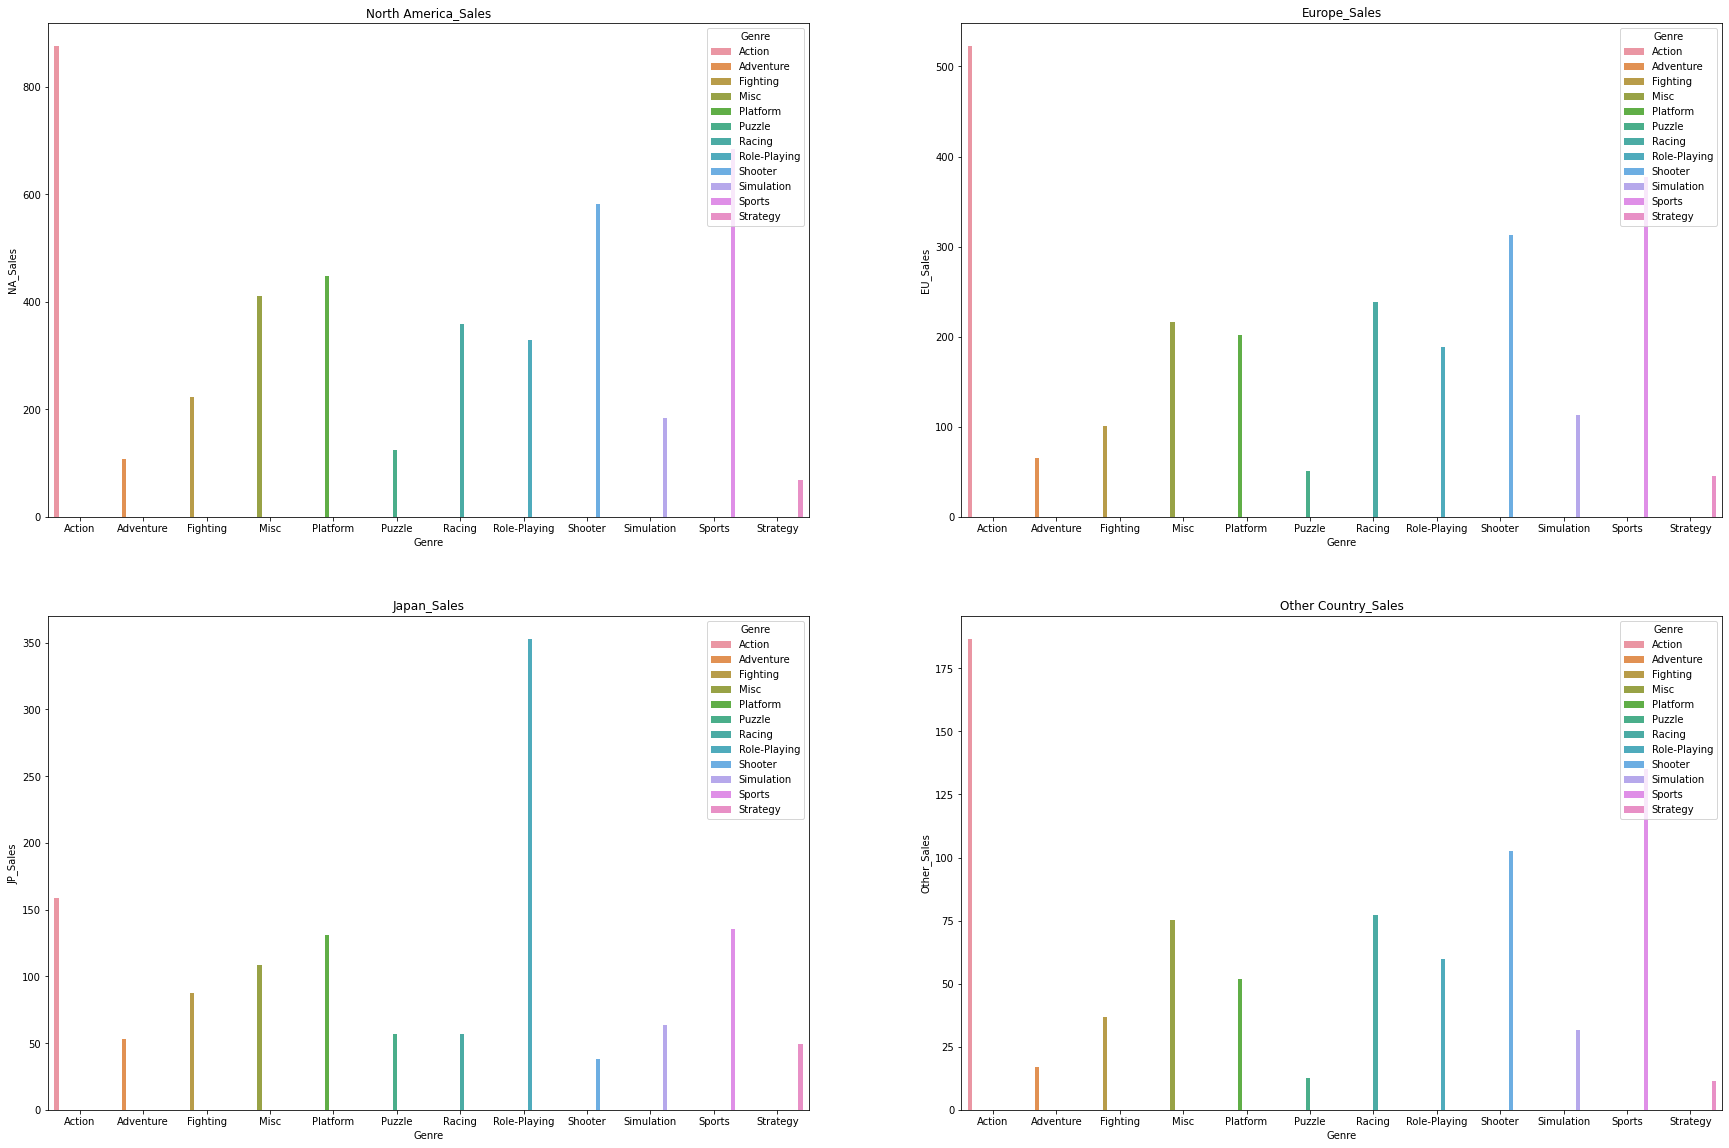

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols =2 ) 
figure.set_size_inches(30,20) 
sns.barplot(data=df_genre2, x="Genre", y="NA_Sales", hue ="Genre", ax= ax1).set_title("North America_Sales")
sns.barplot(data=df_genre2, x="Genre", y="EU_Sales", hue ="Genre", ax=ax2).set_title("Europe_Sales")
sns.barplot(data=df_genre2, x="Genre", y="JP_Sales", hue ="Genre", ax=ax3).set_title("Japan_Sales") 
sns.barplot(data=df_genre2, x="Genre", y="Other_Sales",hue ="Genre", ax=ax4).set_title("Other Country_Sales")  ;

#**[결론]** PART1. **지역**에 따라서 **선호하는 게임 장르**가 다를까?   
** **모든 시기(Year)에 걸친, 게임 장르별 총 Sales를 기준으로 판단** **

        북미(NA) : 1등 Action       유럽(EU) : 1등 Action       일본(JP) : 1등 Role-Playing     그외(Other) : 1등 Action
                  2등 Sport                  2등 Sport                  2등 Action                        2등 Sport 
                  3등 Shooter                3등 Shooter                3등 Sport                         3등 Shooter 
                  4등 Platform               4등 Racing                 4등 Platform                      4등 Racing  
                  5등 Misc                   5등 Misc                   5등 Misc                          5등 Misc

- 북미, 유럽, Other  
              선호하는 장르가 동일합니다.
              'Action' 장르가 가장 인기있는 가운데 'Sport'와 'Shooter' 장르가 그 뒤를 잇고 있습니다.     

- 일본  
              'Role-Playing' 장르가 월등히 인기 있는 가운데 그 뒤를 잇는 나머지 네 장르는
              비슷한 선호도를 보이고 있습니다.  

#PART2. **연도별 게임의 트렌드**가 있을까?
- PART2_1. 연도에 따른 지역별 게임 구매량
- PART2_2_1. 연도에 따른 게임 장르의 트랜드 (전세계)
- PART2_2_2. 연도에 따른 게임 장르의 트랜드 (지역별)
- PART2_3_1. 연도에 따른 플랫폼 선호도(전세계)
- PART2_3_2. 연도에 따른 플랫폼 선호도(지역별)
- PART2_4. 연도에 따른 퍼블리셔의 게임sales 비교

In [ ]:
# Year 컬럼(Continous Feature) : Categorical Feature로 변환

df['Year_band'] = 0


df.loc[(df['Year']>=1980)&(df['Year']<1990),'Year_band'] = 1
df.loc[(df['Year']>=1990)&(df['Year']<2000),'Year_band'] = 2
df.loc[(df['Year']>=2000)&(df['Year']<2010),'Year_band'] = 3
df.loc[df['Year']>=2010,'Year_band'] = 4
df.head(11)
#df['Year_band'].unique()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,3,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,3,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,4,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,4,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,4,0.25
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,3,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,4,0.03
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01,3,0.19
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,3,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,4,0.08


#PART2_1. **연도**에 따른 **지역별 게임 구매량**

In [ ]:
# '게임 한개당 sum of sales' = ['NA_Sales'] + ['EU_Sales'] +	['JP_Sales'] +	['Other_Sales']

df['sum of sales'] = df['NA_Sales'] + df['EU_Sales'] +	df['JP_Sales'] +	df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,3,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,3,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,4,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,4,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,4,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,3,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,3,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,4,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,4,0.38


In [ ]:
df_year = df.groupby(['Year_band']).sum()
df_year = df_year.drop(['Year'], axis=1)
df_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum of sales
Year_band,,,,,
1,245.48,31.81,102.49,7.20,386.98
2,578.76,284.47,373.03,47.76,1284.02
3,2463.96,1282.66,522.64,473.93,4743.19
4,1104.75,835.19,292.86,268.86,2501.66


In [ ]:
#two-sample chi-square test 
#귀무가설 : 'Year'와 '지역 sales'간 관계는 독립적일 것이다.

from scipy.stats import chi2_contingency
print(chi2_contingency(df_year)) 

print('='*100)

print('p-value :', chi2_contingency(df_year)[1])
print('결과 해석 : year와 지역 sales간 관계는 서로 의존적이다(독립적이지 않다)')

(493.7188553705181, 4.810940431498095e-98, 12, array([[ 190.669851  ,  105.6500084 ,   56.03491755,   34.62522306,
         386.98      ],
       [ 632.65259723,  350.55228639,  185.92680456,  114.88831183,
        1284.02      ],
       [2337.02860754, 1294.94563891,  686.81652942,  424.39922413,
        4743.19      ],
       [1232.59894424,  682.9820663 ,  362.24174848,  223.83724098,
        2501.66      ]]))
p-value : 4.810940431498095e-98
결과 해석 : year와 지역 sales간 관계는 서로 의존적이다(독립적이지 않다)


In [ ]:
df_year = df_year.reset_index()
df_year

,Year_band,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum of sales
0,1,245.48,31.81,102.49,7.20,386.98
1,2,578.76,284.47,373.03,47.76,1284.02
2,3,2463.96,1282.66,522.64,473.93,4743.19
3,4,1104.75,835.19,292.86,268.86,2501.66


1980 ~ 2010년까지는 모든 지역에서 게임소비가 증가하다가 2010 ~ 2020년까지 감소추세를 보였다.
가장 많은 게임소비는 북아메리카에서 이루어졌다 


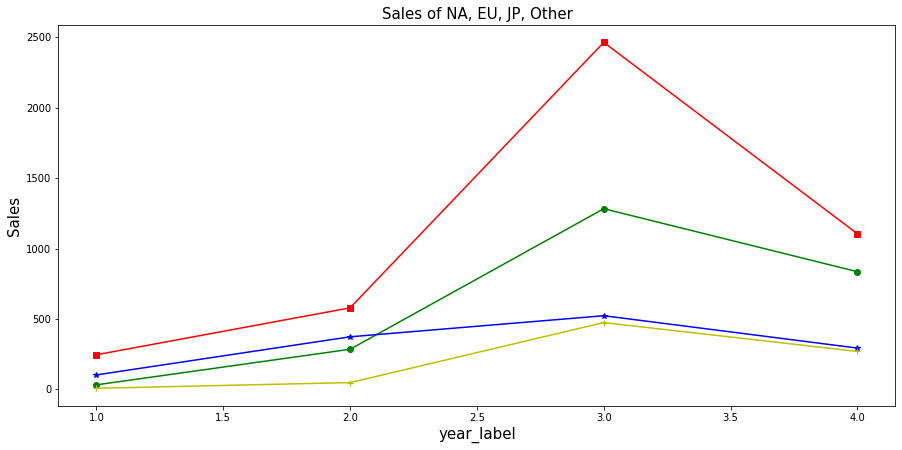

In [ ]:
#hue 보이는 그래프로 바꿔보자

f,ax=plt.subplots(figsize=(15,7))

a = plt.plot(df_year.Year_band, df_year.NA_Sales, marker='s', color='r')

b = plt.plot(df_year.Year_band, df_year.EU_Sales, marker='o', color='g')

c = plt.plot(df_year.Year_band, df_year.JP_Sales, marker='*', color='b')

d = plt.plot(df_year.Year_band, df_year.Other_Sales, marker='+', color='y')



plt.title('Sales of NA, EU, JP, Other', fontsize=15) 

plt.ylabel('Sales', fontsize=15)

plt.xlabel('year_label', fontsize=15);

print('1980 ~ 2010년까지는 모든 지역에서 게임소비가 증가하다가 2010 ~ 2020년까지 감소추세를 보였다.\n가장 많은 게임소비는 북아메리카에서 이루어졌다 ')

#**[결론]** PART2_1. **연도**에 따른 **지역별 게임 구매량**
** **각 Year_band에 해당하는 모든 게임의 sales 합을 기준으로 판단** **


 
              '북미'는 모든 기간에 걸쳐 게임을 가장 많이 구매하는 지역입니다.
              반면에 'Other'에 해당하는 국가는 모든 기간에 걸쳐 게임을 가장 적게 구매하는 지역입니다.
                 

              'EU'의 경우 1990년대 이전 까지, '일본'보다 적은 게임 구매량을 기록했습니다.
              하지만, 1990년대 이후 '일본'을 앞지르면서 '북미'에 이어 두번째로 게임을 많이        
              구매하는 지역이 되었습니다. 


              2000년대 이후 모든 지역에서 게임 Sales가 감소하고 있습니다. 

#PART2_2_1. **연도**에 따른 **게임 장르의 트랜드** **(전세계)**

In [ ]:
df_year_genre = df.groupby(['Year_band', 'Genre']).sum()
df_year_genre = df_year_genre.drop(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',	'Other_Sales'], axis=1)
df_year_genre.head(15)

sum of sales
Year_band Genre                     
1         Action               54.04
          Adventure             6.08
          Fighting              7.71
          Misc                  8.44
          Platform            122.26
          Puzzle               63.77
          Racing               12.69
          Role-Playing         15.25
          Shooter              63.28
          Simulation            0.51
          Sports               32.95
2         Action              140.72
          Adventure            45.00
          Fighting            123.51
          Misc                 63.43

In [ ]:
df_year_genre2 = df_year_genre.reset_index()
df_year_genre2.head(15)

,Year_band,Genre,sum of sales
0,1,Action,54.04
1,1,Adventure,6.08
2,1,Fighting,7.71
3,1,Misc,8.44
4,1,Platform,122.26
5,1,Puzzle,63.77
6,1,Racing,12.69
7,1,Role-Playing,15.25
8,1,Shooter,63.28
9,1,Simulation,0.51


In [ ]:
import plotly.express as px
px.line(df_year_genre2, x = 'Year_band', y = 'sum of sales', color = 'Genre')

In [ ]:
# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 1]
df_year2_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 2]
df_year3_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 3]
df_year4_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 4]

# 분리된 데이터프레임별로 Genre의 sales rank를 매김

df_year1_genre2['순위'] = df_year1_genre2['sum of sales'].rank(method='min', ascending=False)
df_year2_genre2['순위'] = df_year2_genre2['sum of sales'].rank(method='min', ascending=False)
df_year3_genre2['순위'] = df_year3_genre2['sum of sales'].rank(method='min', ascending=False)
df_year4_genre2['순위'] = df_year4_genre2['sum of sales'].rank(method='min', ascending=False)

# 연도별 매출높은 Genre top 5을 뽑음

df_year1_1 = df_year1_genre2[df_year1_genre2['순위'] <= 5]
df_year2_1 = df_year2_genre2[df_year2_genre2['순위'] <= 5]
df_year3_1 = df_year3_genre2[df_year3_genre2['순위'] <= 5]
df_year4_1 = df_year4_genre2[df_year4_genre2['순위'] <= 5]

In [ ]:
# 순위컬럼기준 오름차순으로 정렬

df_year1_1 = df_year1_1.sort_values(by='순위')
df_year2_1 = df_year2_1.sort_values(by='순위')
df_year3_1 = df_year3_1.sort_values(by='순위')
df_year4_1 = df_year4_1.sort_values(by='순위')

# 모든 dataframe 통합


순위표 = pd.concat([df_year1_1,df_year2_1,df_year3_1,df_year4_1])
순위표 = 순위표.set_index('Year_band')
순위표

,Genre,sum of sales,순위
Year_band,,,
1,Platform,122.26,1.0
1,Puzzle,63.77,2.0
1,Shooter,63.28,3.0
1,Action,54.04,4.0
1,Sports,32.95,5.0
2,Platform,209.99,1.0
2,Role-Playing,184.95,2.0
2,Racing,150.63,3.0
2,Sports,148.13,4.0


#**[결론]** PART2_2_1. **연도**에 따른 **게임 장르 트랜드** **(전세계)**
** **각 Year_band에 해당하는 게임의 장르별 sales 합을 기준으로 판단** **


    1980~1989 : 1등 Platform       1990~1999 : 1등 Platform        2000~2009 : 1등 Action          2010~2020 : 1등 Action
                2등 Puzzle                     2등 Role-Playing                2등 Sports                      2등 Shooter 
                3등 Shooter                    3등 Racing                      3등 Misc                        3등 Sports 
                4등 Action                     4등 Sports                      4등 Role-Playing                4등 Role-Playing  
                5등 Sports                     5등 Action                      5등 Racing                      5등 Misc



- 
              '한 장르'만 제외하고 모든 장르가 2000년대 이후 Sales가 감소하고 있습니다.  
              이유는 'PART2_1. 연도별 게임 Sales 추이'에서 분석된, 
              '2000년대 이후 모든 지역에서 게임 Sales가 감소하고 있습니다.'때문일 것으로 예측됩니다.      
              
              모든 장르의 salesr가 감소할때, 나홀로 sales가 증가하는 장르는 바로 'Shooter' 입니다.
              이는 2010~2020년의 유행을 선도하고 있다고 볼 수 있으며 앞으로 이 장르로 게임을 
              제작해야 한다는 주장에 근거가 될 수 있습니다. 
             

#PART2_2_2. **연도**에 따른 **게임 장르 트랜드** **(지역별)**


In [ ]:
df_year_genre = df.groupby(['Year_band', 'Genre']).sum()
df_year_genre2 = df_year_genre.reset_index()

In [ ]:
#North America's 연도에 따른 장르 sales 추이(지역별)
px.line(df_year_genre2, x = 'Year_band', y = 'NA_Sales', color = 'Genre')

In [ ]:
# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 1]
df_year2_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 2]
df_year3_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 3]
df_year4_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 4]

# 분리된 데이터프레임별로 Genre의 sales rank를 매김

df_year1_genre2['순위'] = df_year1_genre2['NA_Sales'].rank(method='min', ascending=False)
df_year2_genre2['순위'] = df_year2_genre2['NA_Sales'].rank(method='min', ascending=False)
df_year3_genre2['순위'] = df_year3_genre2['NA_Sales'].rank(method='min', ascending=False)
df_year4_genre2['순위'] = df_year4_genre2['NA_Sales'].rank(method='min', ascending=False)

# 연도별 매출높은 Genre top 5을 뽑음

df_year1_NA = df_year1_genre2[df_year1_genre2['순위'] <= 5]
df_year2_NA = df_year2_genre2[df_year2_genre2['순위'] <= 5]
df_year3_NA = df_year3_genre2[df_year3_genre2['순위'] <= 5]
df_year4_NA = df_year4_genre2[df_year4_genre2['순위'] <= 5]

In [ ]:
# 순위컬럼기준 오름차순으로 정렬

df_year1_NA = df_year1_NA.sort_values(by='순위')
df_year2_NA = df_year2_NA.sort_values(by='순위')
df_year3_NA = df_year3_NA.sort_values(by='순위')
df_year4_NA = df_year4_NA.sort_values(by='순위')

# 모든 dataframe 통합


순위표_NA = pd.concat([df_year1_NA, df_year2_NA, df_year3_NA, df_year4_NA])
순위표_NA.set_index('Year_band')
순위표_NA.drop(['Year', 'EU_Sales',	'JP_Sales', 'Other_Sales', 'sum of sales'], axis=1)

,Year_band,Genre,NA_Sales,순위
4,1,Platform,74.34,1.0
8,1,Shooter,54.11,2.0
5,1,Puzzle,44.65,3.0
0,1,Action,40.66,4.0
10,1,Sports,11.77,5.0
15,2,Platform,113.28,1.0
17,2,Racing,77.90,2.0
11,2,Action,73.84,3.0
21,2,Sports,71.47,4.0
13,2,Fighting,56.21,5.0


In [ ]:
#Europe's 연도에 따른 장르 sales 추이(지역별)
px.line(df_year_genre2, x = 'Year_band', y = 'EU_Sales', color = 'Genre')

In [ ]:
# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 1]
df_year2_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 2]
df_year3_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 3]
df_year4_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 4]

# 분리된 데이터프레임별로 Genre의 sales rank를 매김

df_year1_genre2['순위'] = df_year1_genre2['EU_Sales'].rank(method='min', ascending=False)
df_year2_genre2['순위'] = df_year2_genre2['EU_Sales'].rank(method='min', ascending=False)
df_year3_genre2['순위'] = df_year3_genre2['EU_Sales'].rank(method='min', ascending=False)
df_year4_genre2['순위'] = df_year4_genre2['EU_Sales'].rank(method='min', ascending=False)

# 연도별 매출높은 Genre top 5을 뽑음

df_year1_EU = df_year1_genre2[df_year1_genre2['순위'] <= 5]
df_year2_EU = df_year2_genre2[df_year2_genre2['순위'] <= 5]
df_year3_EU = df_year3_genre2[df_year3_genre2['순위'] <= 5]
df_year4_EU = df_year4_genre2[df_year4_genre2['순위'] <= 5]

In [ ]:
# 순위컬럼기준 오름차순으로 정렬

df_year1_EU = df_year1_EU.sort_values(by='순위')
df_year2_EU = df_year2_EU.sort_values(by='순위')
df_year3_EU = df_year3_EU.sort_values(by='순위')
df_year4_EU = df_year4_EU.sort_values(by='순위')


# 모든 dataframe 통합


순위표_EU = pd.concat([df_year1_EU, df_year2_EU, df_year3_EU, df_year4_EU])
순위표_EU.set_index('Year_band')
순위표_EU.drop(['Year', 'NA_Sales',	'JP_Sales', 'Other_Sales', 'sum of sales'], axis=1)

,Year_band,Genre,EU_Sales,순위
4,1,Platform,13.24,1.0
5,1,Puzzle,5.49,2.0
0,1,Action,4.46,3.0
8,1,Shooter,3.03,4.0
10,1,Sports,2.61,5.0
15,2,Platform,46.49,1.0
17,2,Racing,41.22,2.0
11,2,Action,40.65,3.0
18,2,Role-Playing,32.55,4.0
21,2,Sports,29.73,5.0


In [ ]:
#Japan's 연도에 따른 장르 sales 추이(지역별)
px.line(df_year_genre2, x = 'Year_band', y = 'JP_Sales', color = 'Genre')

In [ ]:
# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 1]
df_year2_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 2]
df_year3_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 3]
df_year4_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 4]

# 분리된 데이터프레임별로 Genre의 sales rank를 매김

df_year1_genre2['순위'] = df_year1_genre2['JP_Sales'].rank(method='min', ascending=False)
df_year2_genre2['순위'] = df_year2_genre2['JP_Sales'].rank(method='min', ascending=False)
df_year3_genre2['순위'] = df_year3_genre2['JP_Sales'].rank(method='min', ascending=False)
df_year4_genre2['순위'] = df_year4_genre2['JP_Sales'].rank(method='min', ascending=False)

# 연도별 매출높은 Genre top 5을 뽑음

df_year1_JP = df_year1_genre2[df_year1_genre2['순위'] <= 5]
df_year2_JP = df_year2_genre2[df_year2_genre2['순위'] <= 5]
df_year3_JP = df_year3_genre2[df_year3_genre2['순위'] <= 5]
df_year4_JP = df_year4_genre2[df_year4_genre2['순위'] <= 5]

In [ ]:
# 순위컬럼기준 오름차순으로 정렬

df_year1_JP = df_year1_JP.sort_values(by='순위')
df_year2_JP = df_year2_JP.sort_values(by='순위')
df_year3_JP = df_year3_JP.sort_values(by='순위')
df_year4_JP = df_year4_JP.sort_values(by='순위')


# 모든 dataframe 통합


순위표_JP = pd.concat([df_year1_JP, df_year2_JP, df_year3_JP, df_year4_JP])
순위표_JP.set_index('Year_band')
순위표_JP.drop(['Year', 'NA_Sales',	'EU_Sales', 'Other_Sales', 'sum of sales'], axis=1)

,Year_band,Genre,JP_Sales,순위
4,1,Platform,32.45,1.0
10,1,Sports,18.20,2.0
7,1,Role-Playing,12.68,3.0
5,1,Puzzle,12.47,4.0
0,1,Action,8.31,5.0
18,2,Role-Playing,99.29,1.0
15,2,Platform,42.99,2.0
21,2,Sports,41.02,3.0
13,2,Fighting,39.47,4.0
17,2,Racing,25.20,5.0


In [ ]:
#Other's 연도에 따른 장르 sales 추이(지역별)
px.line(df_year_genre2, x = 'Year_band', y = 'Other_Sales', color = 'Genre')

In [ ]:
# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 1]
df_year2_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 2]
df_year3_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 3]
df_year4_genre2 = df_year_genre2[df_year_genre2['Year_band'] == 4]

# 분리된 데이터프레임별로 Genre의 sales rank를 매김

df_year1_genre2['순위'] = df_year1_genre2['Other_Sales'].rank(method='min', ascending=False)
df_year2_genre2['순위'] = df_year2_genre2['Other_Sales'].rank(method='min', ascending=False)
df_year3_genre2['순위'] = df_year3_genre2['Other_Sales'].rank(method='min', ascending=False)
df_year4_genre2['순위'] = df_year4_genre2['Other_Sales'].rank(method='min', ascending=False)

# 연도별 매출높은 Genre top 5을 뽑음

df_year1_Other = df_year1_genre2[df_year1_genre2['순위'] <= 5]
df_year2_Other = df_year2_genre2[df_year2_genre2['순위'] <= 5]
df_year3_Other = df_year3_genre2[df_year3_genre2['순위'] <= 5]
df_year4_Other = df_year4_genre2[df_year4_genre2['순위'] <= 5]

In [ ]:
# 순위컬럼기준 오름차순으로 정렬

df_year1_Other = df_year1_Other.sort_values(by='순위')
df_year2_Other = df_year2_Other.sort_values(by='순위')
df_year3_Other = df_year3_Other.sort_values(by='순위')
df_year4_Other = df_year4_Other.sort_values(by='순위')


# 모든 dataframe 통합


순위표_Other = pd.concat([df_year1_Other, df_year2_Other, df_year3_Other, df_year4_Other])
순위표_Other.set_index('Year_band')
순위표_Other.drop(['Year', 'NA_Sales',	'EU_Sales', 'JP_Sales', 'sum of sales'], axis=1)

,Year_band,Genre,Other_Sales,순위
4,1,Platform,2.23,1.0
7,1,Role-Playing,1.51,2.0
5,1,Puzzle,1.16,3.0
8,1,Shooter,0.84,4.0
0,1,Action,0.61,5.0
15,2,Platform,7.23,1.0
11,2,Action,6.63,2.0
18,2,Role-Playing,6.43,3.0
17,2,Racing,6.31,4.0
21,2,Sports,5.91,5.0


#**[결론]** PART2_2_2. **연도**에 따른 **게임 장르 트랜드** **(지역별)**


** **각 지역의 각 Year_band에 해당하는 장르별 sales 합을 기준으로 판단** **
**(유의미한 year밴드 구간만 설명)**




---



- North America : 유의미한 구간(1990 ~ 2020)

  
      1990~1999 : 1등 Platform        2000~2009 : 1등 Action        2010~2020 : 1등 Action           
                  2등 Racing                      2등 Sports                    2등 Shooter                       
                  3등 Action                      3등 Shooter                   3등 Sports                       
                  4등 Sports                      4등 Misc                      4등 Misc              
                  5등 Fighting                    5등 Racing                    5등 Role-Playing                     

- 
               
              North America의 경우, '2000년대 이후 모든 장르에서 Sales가 감소하고 있습니다.
              'Sport' 장르의 Sales가 급격하게 감소하면서 'Shooter'와 'Sport'의 순위가 바뀌었고,
              최근에는 'Action'과'Shooter'가 1,2위를 차지하고 있습니다.    
              
---

- Europe : 유의미한 구간(1990 ~ 2020)

  
      1990~1999 : 1등 Platform        2000~2009 : 1등 Action	     2010~2020 : 1등 Action           
                  2등 Racing                      2등 Sports                     2등 Shooter                       
                  3등 Action                      3등 Racing                     3등 Sports                       
                  4등 Racing                      4등 Misc                       4등 Misc              
                  5등 Sports                      5등 Shooter                    5등 Role-Playing                     


- 
               
              Europe의 경우, '2000년대 이후 한 장르를 제외한 모든 장르에서 Sales가 감소하고 있습니다.
              인기 장르인 'Sports'의 Sales가 급격하게 감소하고 'Shooter' 장르의 Sales가 일정하게 증가하면서 
              'Shooter'와 'Sport'의 순위가 바뀌었고,
              최근에는 'Action'과'Shooter'가 1,2위를 차지하고 있습니다. 


---
- Japan : 유의미한 구간(1990 ~ 2020)

  
      1990~1999 : 1등 Platform        2000~2009 : 1등 Role-Playing	2010~2020 : 1등 Role-Playing           
                  2등 Action                      2등 Misc                        2등 Action                       
                  3등 Role-Playing                3등 Sports                      3등 Misc                       
                  4등 Puzzle                      4등 Action                      4등 Platform              
                  5등 Action                      5등 Platform                    5등 Adventure        

- 
               
              Japan의 경우, '2000년대 이후 두 장르를 제외한 모든 장르에서 게임 Sales가 감소하고 있습니다.
              지난 30년 이상 부동의 1등 이었던 'Role-Playing'장르의 sales가 가파르게 하강하고 있지만, 
              여전히 1위자리를 수성하고 있습니다.
              성장하고 있는 장르는 'Action'과 'Shooter'이며 이중 'Action'은 꾸준히 성장하여 
              10년새 2계단 뛰어올라 최근에는  'Role-Playing'과 'Action'이 1,2위를 차지하고 있습니다. 

---
- Other : 유의미한 구간(1990 ~ 2020)

  
      1990~1999 : 1등 Platform        2000~2009 : 1등 Action	      2010~2020 : 1등 Action           
                  2등 Sports                      2등 Sports                      2등 Shooter                       
                  3등 Role-Playing                3등 Racing                      3등 Sports                       
                  4등 Puzzle                      4등 Misc                        4등 Role-Playing              
                  5등 Action                      5등 Shooter                     5등 Misc   


- 
               
              Other의 경우, Europe와 상황이 같으며
              최근에는 'Action'과'Shooter'가 1,2위를 차지하고 있습니다.

---



 
             

#PART2_3_1. **연도**에 따른 **플랫폼 선호도** (전세계)

In [ ]:
df.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df_platform = df.groupby(['Year_band', 'Platform']).sum()
df_platform = df_platform.drop(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',	'Other_Sales'], axis=1)
df_platform.head(10)

sum of sales
Year_band Platform              
1         2600             96.98
          DS                0.02
          GB               66.40
          NES             223.51
          PC                0.07
2         3DO               0.10
          DC                8.54
          GB              160.26
          GEN              28.35
          GG                0.04

In [ ]:
df_platform2 = df_platform.reset_index()

In [ ]:
# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_platform2 = df_platform2[df_platform2['Year_band'] == 1]
df_year2_platform2 = df_platform2[df_platform2['Year_band'] == 2]
df_year3_platform2 = df_platform2[df_platform2['Year_band'] == 3]
df_year4_platform2 = df_platform2[df_platform2['Year_band'] == 4]

# 분리된 데이터프레임별로 Platform의 sales rank를 매김

df_year1_platform2['순위'] = df_year1_platform2['sum of sales'].rank(method = 'min', ascending=False)
df_year2_platform2['순위'] = df_year2_platform2['sum of sales'].rank(method = 'min', ascending=False)
df_year3_platform2['순위'] = df_year3_platform2['sum of sales'].rank(method = 'min', ascending=False)
df_year4_platform2['순위'] = df_year4_platform2['sum of sales'].rank(method = 'min', ascending=False)

# 연도별 매출높은 Platform top 5을 뽑음

df_year1_platform3 = df_year1_platform2[df_year1_platform2['순위'] <= 5]
df_year2_platform3 = df_year2_platform2[df_year2_platform2['순위'] <= 5]
df_year3_platform3 = df_year3_platform2[df_year3_platform2['순위'] <= 5]
df_year4_platform3 = df_year4_platform2[df_year4_platform2['순위'] <= 5]

In [ ]:
# 순위컬럼기준 오름차순으로 정렬

df_year1_platform3 = df_year1_platform3.sort_values(by='순위')
df_year2_platform3 = df_year2_platform3.sort_values(by='순위')
df_year3_platform3 = df_year3_platform3.sort_values(by='순위')
df_year4_platform3 = df_year4_platform3.sort_values(by='순위')

# 모든 dataframe 통합


순위표_platform = pd.concat([df_year1_platform3, df_year2_platform3, df_year3_platform3, df_year4_platform3])
순위표_platform.set_index('Year_band')

,Platform,sum of sales,순위
Year_band,,,
1,NES,223.51,1.0
1,2600,96.98,2.0
1,GB,66.40,3.0
1,PC,0.07,4.0
1,DS,0.02,5.0
2,PS,590.27,1.0
2,SNES,200.04,2.0
2,N64,181.38,3.0
2,GB,160.26,4.0


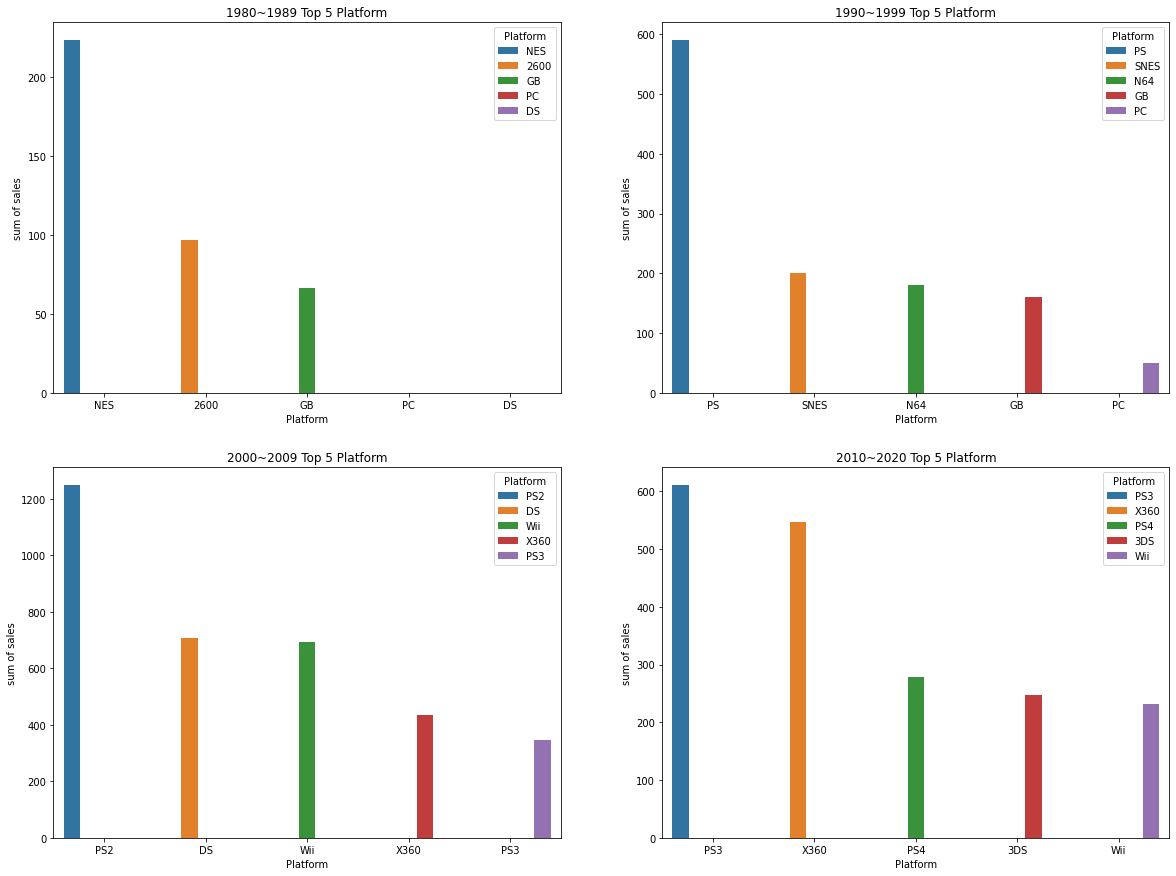

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols =2 ) 
figure.set_size_inches(20,15) 
sns.barplot(data=df_year1_platform3, x="Platform", y="sum of sales", hue ="Platform", ax= ax1).set_title("1980~1989 Top 5 Platform")
sns.barplot(data=df_year2_platform3, x="Platform", y="sum of sales", hue ="Platform", ax= ax2).set_title("1990~1999 Top 5 Platform")
sns.barplot(data=df_year3_platform3, x="Platform", y="sum of sales", hue ="Platform", ax= ax3).set_title("2000~2009 Top 5 Platform")
sns.barplot(data=df_year4_platform3, x="Platform", y="sum of sales", hue ="Platform", ax= ax4).set_title("2010~2020 Top 5 Platform") ;

#**[결론]**PART2_3_1. **연도**에 따른 **플랫폼 선호도** (전세계)


- 2000 ~ 2020년 까지의 경향
  
        1. 'PS' platform 이 가장 점유율이 높습니다. 
        2. 'X360' platform 은 시간이 지나면서 'PS'와 견줄만한 점유율을 보이고 있습니다.
            차트상 이는 Wii'와 'DS'의 점유율을 상당부분 가져오면서 생긴 결과라 추측할 수 있습니다.
        3. 'Wii'와 'DS' platform 은 시간에 따라 점유율이 떨어지고 있습니다.
        
        [결론] 현재는 'PS', 'X360'이 가장 선호도가 높습니다 



#PART2_3_2. **연도**에 따른 **플랫폼 선호도** (지역별)

In [ ]:
df_platform = df.groupby(['Year_band', 'Platform']).sum()
df_platform2 = df_platform.reset_index()

# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_platform2 = df_platform2[df_platform2['Year_band'] == 1]
df_year2_platform2 = df_platform2[df_platform2['Year_band'] == 2]
df_year3_platform2 = df_platform2[df_platform2['Year_band'] == 3]
df_year4_platform2 = df_platform2[df_platform2['Year_band'] == 4]

# 분리된 데이터프레임별로 Platform의 sales rank를 매김

df_year1_platform2['순위'] = df_year1_platform2['sum of sales'].rank(method = 'min', ascending=False)
df_year2_platform2['순위'] = df_year2_platform2['sum of sales'].rank(method = 'min', ascending=False)
df_year3_platform2['순위'] = df_year3_platform2['sum of sales'].rank(method = 'min', ascending=False)
df_year4_platform2['순위'] = df_year4_platform2['sum of sales'].rank(method = 'min', ascending=False)

# 연도별 매출높은 Platform top 5을 뽑음

df_year1_platform3 = df_year1_platform2[df_year1_platform2['순위'] <= 5]
df_year2_platform3 = df_year2_platform2[df_year2_platform2['순위'] <= 5]
df_year3_platform3 = df_year3_platform2[df_year3_platform2['순위'] <= 5]
df_year4_platform3 = df_year4_platform2[df_year4_platform2['순위'] <= 5]

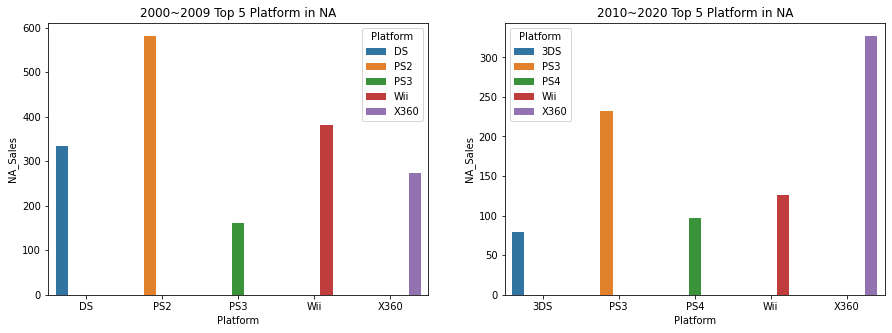

In [ ]:
figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2 ) 
figure.set_size_inches(15,5) 

sns.barplot(data=df_year3_platform3, x="Platform", y="NA_Sales", hue ="Platform", ax= ax1).set_title("2000~2009 Top 5 Platform in NA")
sns.barplot(data=df_year4_platform3, x="Platform", y="NA_Sales", hue ="Platform", ax= ax2).set_title("2010~2020 Top 5 Platform in NA") ;

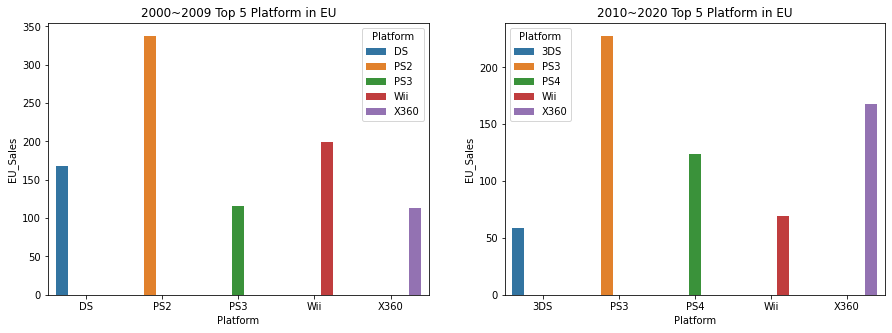

In [ ]:
figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2 ) 
figure.set_size_inches(15,5) 

sns.barplot(data=df_year3_platform3, x="Platform", y="EU_Sales", hue ="Platform", ax= ax1).set_title("2000~2009 Top 5 Platform in EU")
sns.barplot(data=df_year4_platform3, x="Platform", y="EU_Sales", hue ="Platform", ax= ax2).set_title("2010~2020 Top 5 Platform in EU") ;

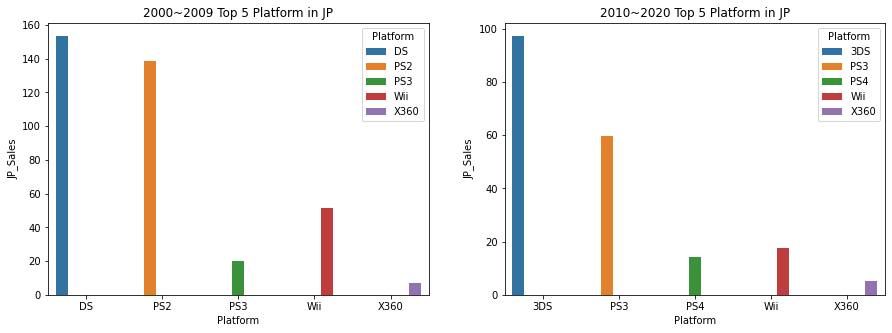

In [ ]:
figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2 ) 
figure.set_size_inches(15,5) 

sns.barplot(data=df_year3_platform3, x="Platform", y="JP_Sales", hue ="Platform", ax= ax1).set_title("2000~2009 Top 5 Platform in JP")
sns.barplot(data=df_year4_platform3, x="Platform", y="JP_Sales", hue ="Platform", ax= ax2).set_title("2010~2020 Top 5 Platform in JP");

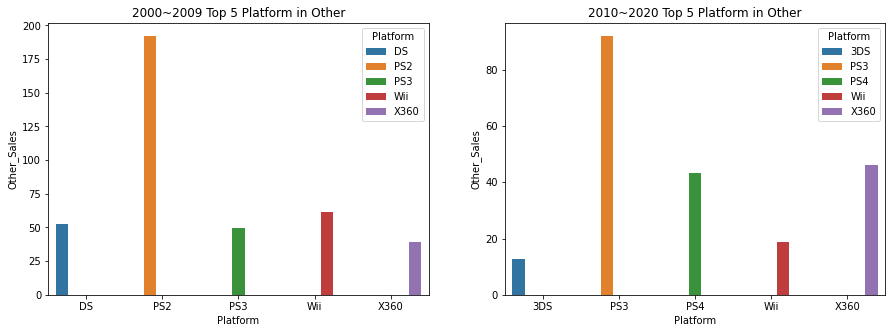

In [ ]:
figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2 ) 
figure.set_size_inches(15,5) 

sns.barplot(data=df_year3_platform3, x="Platform", y="Other_Sales", hue ="Platform", ax= ax1).set_title("2000~2009 Top 5 Platform in Other")
sns.barplot(data=df_year4_platform3, x="Platform", y="Other_Sales", hue ="Platform", ax= ax2).set_title("2010~2020 Top 5 Platform in Other");

#**[결론]** PART2_3_2. **연도**에 따른 **플랫폼 선호도**(지역별)


- 2000 ~ 2020년 까지의 경향
  
        1. NA,EU : 'PS(PS3+PS4)'가 점유율 1위이며 그 다음으로 'X360' 점유율이 높습니다. 
        2. JP : '3DS'가 점유율 1위이며 그 다음으로 'PS' 점유율이 높습니다.
        3. Other : 'PS'가 점유율 1위입니다.

#PART2_4. **연도**에 따른 **퍼블리셔의 게임sales** 비교

In [ ]:
df.Publisher.unique()

In [ ]:
df_Publisher = df.groupby(['Year_band','Publisher']).sum()
df_Publisher = df_Publisher.drop(['Year',	'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], axis = 1)
df_Publisher

sum of sales
Year_band Publisher                                 
1         20th Century Fox Video Games          1.93
          Activision                           19.49
          Answer Software                       0.50
          Atari                                50.03
          Avalon Interactive                    0.16
...                                              ...
4         dramatic create                       0.11
          iWin                                  0.06
          imageepoch Inc.                       0.04
          inXile Entertainment                  0.09
          mixi, Inc                             0.86

[837 rows x 1 columns]

In [ ]:
df_Publisher2 = df_Publisher.reset_index()
df_Publisher2

,Year_band,Publisher,sum of sales
0,1,20th Century Fox Video Games,1.93
1,1,Activision,19.49
2,1,Answer Software,0.50
3,1,Atari,50.03
4,1,Avalon Interactive,0.16
...,...,...,...
832,4,dramatic create,0.11
833,4,iWin,0.06
834,4,imageepoch Inc.,0.04
835,4,inXile Entertainment,0.09


In [ ]:
# year_band의 value값을[1,2,3,4]기준으로 DataFrame 분리

df_year1_Publisher2 = df_Publisher2[df_Publisher2['Year_band'] == 1]
df_year2_Publisher2 = df_Publisher2[df_Publisher2['Year_band'] == 2]
df_year3_Publisher2 = df_Publisher2[df_Publisher2['Year_band'] == 3]
df_year4_Publisher2 = df_Publisher2[df_Publisher2['Year_band'] == 4]

# 분리된 데이터프레임별로 Publisher의 sales rank를 매김

df_year1_Publisher2['순위'] = df_year1_Publisher2['sum of sales'].rank(method = 'min', ascending=False)
df_year2_Publisher2['순위'] = df_year2_Publisher2['sum of sales'].rank(method = 'min', ascending=False)
df_year3_Publisher2['순위'] = df_year3_Publisher2['sum of sales'].rank(method = 'min', ascending=False)
df_year4_Publisher2['순위'] = df_year4_Publisher2['sum of sales'].rank(method = 'min', ascending=False)

# 연도별 매출높은 Publisher top 6을 뽑음

df_year1_Publisher3 = df_year1_Publisher2[df_year1_Publisher2['순위'] <= 6]
df_year2_Publisher3 = df_year2_Publisher2[df_year2_Publisher2['순위'] <= 6]
df_year3_Publisher3 = df_year3_Publisher2[df_year3_Publisher2['순위'] <= 6]
df_year4_Publisher3 = df_year4_Publisher2[df_year4_Publisher2['순위'] <= 6]

In [ ]:
# 순위컬럼기준 오름차순으로 정렬

df_year1_Publisher3 = df_year1_Publisher3.sort_values(by='순위')
df_year2_Publisher3 = df_year2_Publisher3.sort_values(by='순위')
df_year3_Publisher3 = df_year3_Publisher3.sort_values(by='순위')
df_year4_Publisher3 = df_year4_Publisher3.sort_values(by='순위')

# 모든 dataframe 통합

순위표_Publisher = pd.concat([df_year1_Publisher3, df_year2_Publisher3, df_year3_Publisher3, df_year4_Publisher3])
순위표_Publisher.set_index('Year_band')
순위표_Publisher

,Year_band,Publisher,sum of sales,순위
23,1,Nintendo,234.89,1.0
3,1,Atari,50.03,2.0
1,1,Activision,19.49,3.0
22,1,Namco Bandai Games,16.37,4.0
8,1,Capcom,11.73,5.0
13,1,Hudson Soft,6.79,6.0
157,2,Nintendo,366.10,1.0
187,2,Sony Computer Entertainment,171.75,2.0
83,2,Electronic Arts,84.93,3.0
128,2,Konami Digital Entertainment,49.11,4.0


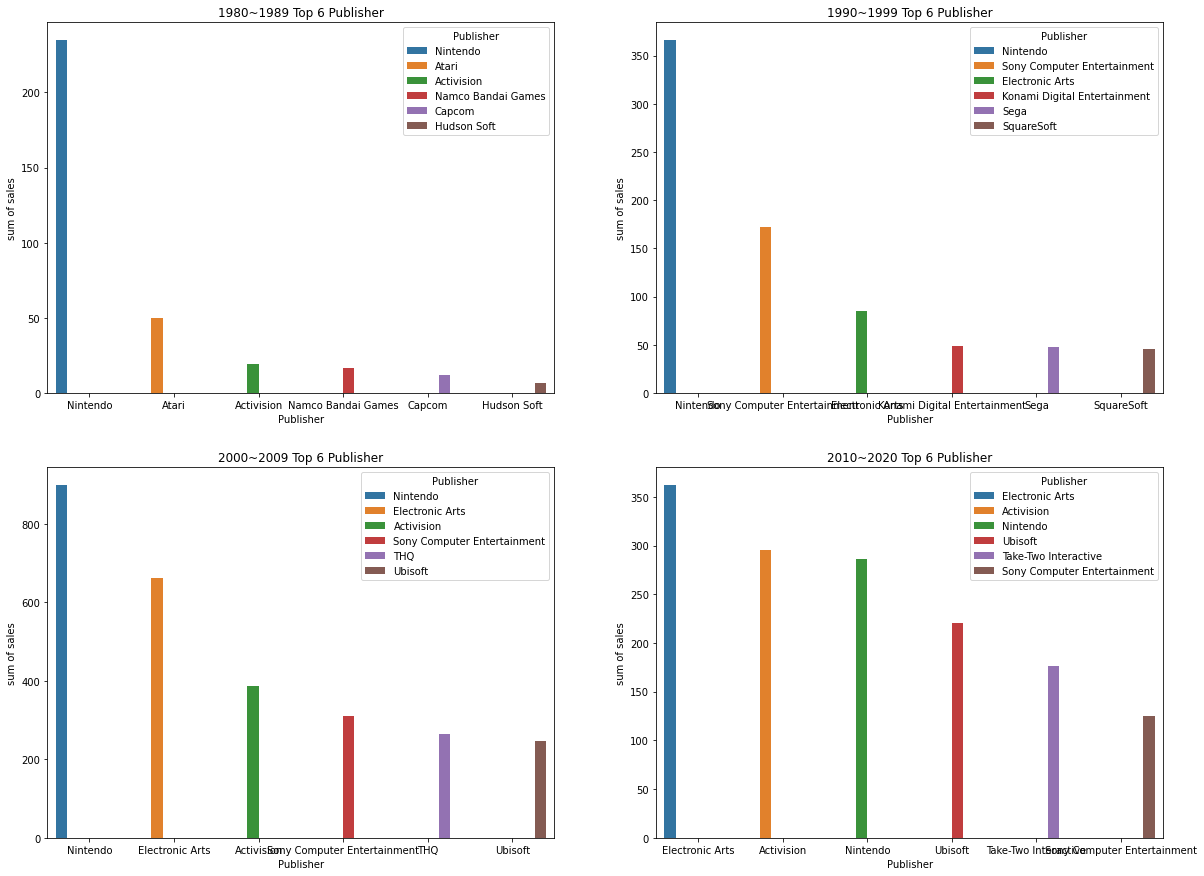

In [ ]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols =2 ) 
figure.set_size_inches(20,15) 
sns.barplot(data=df_year1_Publisher3, x="Publisher", y="sum of sales", hue ="Publisher", ax= ax1).set_title("1980~1989 Top 6 Publisher")
sns.barplot(data=df_year2_Publisher3, x="Publisher", y="sum of sales", hue ="Publisher", ax= ax2).set_title("1990~1999 Top 6 Publisher")
sns.barplot(data=df_year3_Publisher3, x="Publisher", y="sum of sales", hue ="Publisher", ax= ax3).set_title("2000~2009 Top 6 Publisher")
sns.barplot(data=df_year4_Publisher3, x="Publisher", y="sum of sales", hue ="Publisher", ax= ax4).set_title("2010~2020 Top 6 Publisher") ;

#**[결론]** PART2_4. 연도에 따른 퍼블리셔의 게임sales 비교


- 2000 ~ 2020년 분석
  
        1. 2000 ~ 2010 매출

          - 1등 : 'Nintendo'
          - 2등 : 'Electronic Arts'
          - 3등 : 'Activision'
        
        2. 2010 ~ 2020 매출
        
          - 1등 : 'Electronic Arts'
          - 2등 : 'Activision'
          - 3등 : 'Nintendo'
            
          [결론] : 3강 체제가 20년동안 유지되었습니다.

#PART3. **매출이 높은 게임**에 대한 분석 및 시각화 프로세스

In [ ]:
# 2000 ~ 2010 sum of sales top 5

df_sales = df[df['Year_band'] == 3]
df_sales = df_sales.sort_values(by='sum of sales' ,ascending=False)
df_sales = df_sales.head()
df_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,3,82.74
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,3,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,3,33.00
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,3,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,3,29.01


In [ ]:
# 2010 ~ 2020 sum of sales top 5

df_sales2 = df[df['Year_band'] == 4]
df_sales2 = df_sales2.sort_values(by='sum of sales' ,ascending=False)
df_sales2 = df_sales2.head()
df_sales2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,4,21.82
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,4,21.39
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,4,16.38
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,4,14.76
6248,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,4,14.64


In [ ]:
df[df['Name'] == 'Call of Duty: Modern Warfare 3']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,4,14.76
4992,Call of Duty: Modern Warfare 3,Wii,2011.0,Shooter,Activision,0.60,0.21,0.00,0.08,4,0.89
11180,Call of Duty: Modern Warfare 3,PC,2011.0,Shooter,Activision,0.41,0.98,0.00,0.33,4,1.72
14120,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,4,13.47


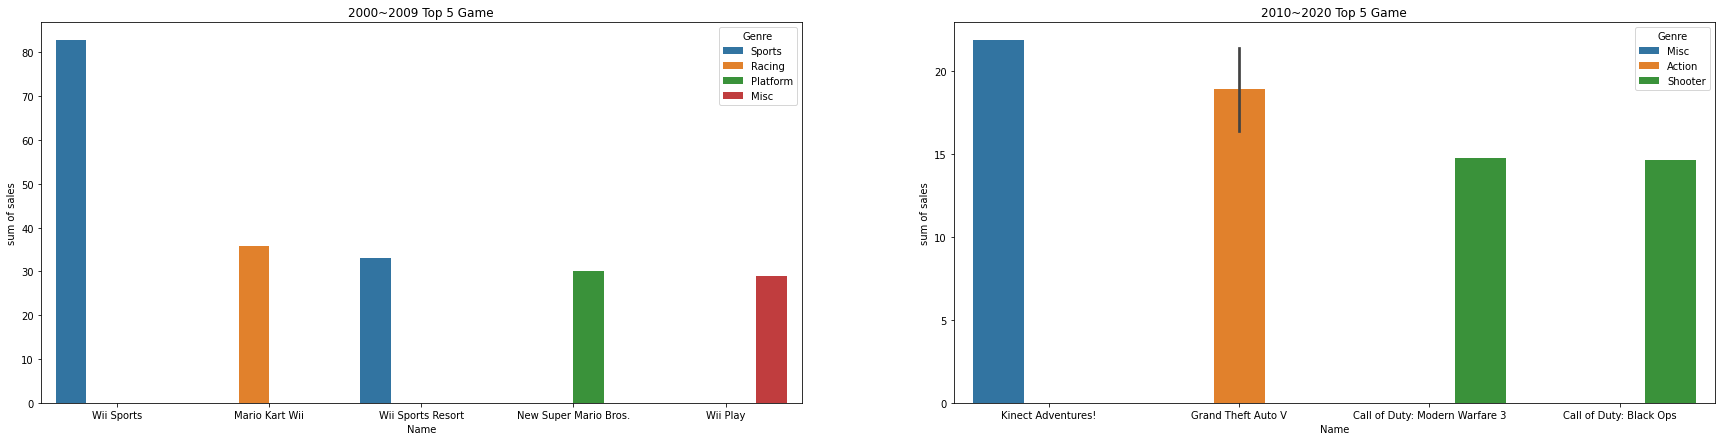

In [ ]:
#시각화

figure, (ax1,ax2) = plt.subplots(nrows = 1, ncols =2 ) 
figure.set_size_inches(30,7) 

sns.barplot(data=df_sales, x="Name", y="sum of sales", hue ="Genre", ax= ax1).set_title("2000~2009 Top 5 Game")
sns.barplot(data=df_sales2, x="Name", y="sum of sales", hue ="Genre", ax= ax2).set_title("2010~2020 Top 5 Game") ;

#**[결론]** PART3. **매출이 높은 게임**에 대한 분석 및 시각화 프로세스


- 2000 ~ 2010년 분석
  
        1. 'Wii', 'DS' Platform에 출시된 게임이 최고의 매출을 달성했습니다.
            당시 이 Platform들은 매출이 top 5안에 들었으므로 납득할만한 결과입니다. 

        2. 관련 장르는 'Sports','Racing'이며, 'Racing'매출이 좋다는 결과는 상당히 의외의 결과였습니다.
           그 이유는 'PART2_2_1.연도에 따른 게임 장르 트랜드(전세계)'의 데이터에 기반했을 때, 
           'Racing'은 중간 정도의 선호도를 갖고있기 때문입니다.
            
        3. top 5 game 의 Publisher는 모두 'Nintendo'로, 당시 'Nintendo'는 매출이 
           top 1 이었으므로 납득할만한 결과입니다. 

- 2010 ~ 2020년 분석
  
        1. 'PS', 'X360' Platform에 출시된 게임이 최고의 매출을 달성했습니다.
            당시 이 Platform들은 총 게임 sales매출이 top1,2 이었으므로 납득할만한 결과입니다. 

        2. 관련 장르는 'Misc', 'Action','Shooter'이며, 'Misc'매출이 좋다는 결과는 의외의 결과였지만, 납득할만 합니다.
           그 이유는 'PART2_2_1.연도에 따른 게임 장르 트랜드 (전세계)'의 데이터에 기반했을 때, 
           'Misc'는 2020년에는 선호도가 5위였지만 2010~2012년에는 3등의 선호도를 갖고있었기 때문입니다.
            
        3. top 5 game 의 Publisher는 'Microsoft Game Studio', 'Take-Two Interactive', 'Activision' 입니다.
           'Microsoft Game Studio'를 제외한 나머지 Publisher는 그 당시 매출이 top 5  안에 들고 있었으므로 납득할만한 결과입니다. 
        
  
- [결론] 이전 분석 경향성에서 벗어나는 결과가 일부 있지만, 전반적으로 경향에 맞다고 볼 수 있습니다. 

#PART4. **[중간정리]** 


---


**지금까지의 데이터 분석 결과를 정리**


---



1. 지역별 게임 판매량
            
            - 1등 : 북미
            - 2등 : 유럽
            - 3등 : 일본
            - 4등 : Other 

   
2. 최근 게임 장르 트랜드
            
          2.1 최근 게임 장르 트랜드(전세계)

            - 1등 : 'Action'  
            - 2등 : 'Shooter' 
        
          2.2 최근 게임 장르 트랜드(지역별)        

            [북아메리카]                          [유럽]                           
            
            - 1등 : 'Action'                    - 1등 : 'Action' 
            - 2등 : 'Shooter'                   - 2등 : 'Shooter'

            [일본]                               [Other Regieon]                         
            
            - 1등 : 'Role-Playing'             - 1등 : 'Action' 
            - 2등 : 'Action'                   - 2등 : 'Shooter'


3. 최근 플랫폼 선호도
          
          3.1 최근 플랫폼 선호도(전세계)
          
            - 'PS', 'X360'

          3.2 최근 플랫폼 선호도(지역별)
          
            - [북아메리카], [유럽]   :  'PS', 'X360'  
            
            - [일본]              :  '3DS', 'PS' 

            - [Other]            :  'PS'

4. 결론
          
          [1순위] 'Action' 장르 게임
                 
                 모든 지역에서 선호되는 장르이기 떄문에 게임 제작시 1순위로 고려해야 합니다.
          
          [2순위] 'Shooter' 장르 게임

                 일본을 제외한 모든 지역에서 선호되는 장르이기 떄문에 게임 제작시 2순위로 고려해야 합니다.

          [3순위] 'Role-Playing' 장르 게임

                 주로 일본에서 선호되는 장르로서, 목표시장을 일본 단독으로 잡아도 수익성이 나쁘지 않습니다. 
         

          
          
    
 

      


#PART5. 게임 **Publisher** 선정

In [ ]:
#2010 ~ 2020에 관련 장르에 대해 매출이 높았던 회사에게 의뢰 -> 시각화하자

df_Action_PS3 = df[(df['Year_band'] == 4) & (df['Genre'] == 'Action') & (df['Platform'] == 'PS3')]
df_Action_PS3.sort_values(by='NA_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,4,21.39
16276,Red Dead Redemption,PS3,2010.0,Action,Take-Two Interactive,2.79,2.61,0.17,1.03,4,6.60
11868,Uncharted 3: Drake's Deception,PS3,2011.0,Action,Sony Computer Entertainment,2.77,2.80,0.19,1.06,4,6.82
5544,God of War III,PS3,2010.0,Action,Sony Computer Entertainment,2.74,1.36,0.12,0.63,4,4.85
14823,Batman: Arkham City,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,2.70,1.91,0.11,0.80,4,5.52
...,...,...,...,...,...,...,...,...,...,...,...
7526,Ukiyo no Shishi,PS3,2015.0,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,4,0.03
7098,The God of War Trilogy,PS3,2010.0,Action,Sony Computer Entertainment,0.00,0.07,0.03,0.02,4,0.12
7053,3rd Super Robot Wars Z: Tengoku-Hen,PS3,2015.0,Action,Namco Bandai Games,0.00,0.00,0.15,0.00,4,0.15
6844,No More Heroes: Red Zone,PS3,2011.0,Action,Marvelous Interactive,0.00,0.00,0.09,0.00,4,0.09


In [ ]:
df_Action_PS4 = df[(df['Year_band'] == 4) & (df['Genre'] == 'Action') & (df['Platform'] == 'PS4')]
df_Action_PS4.sort_values(by='NA_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
2008,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,4,11.99
13604,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,Sony Computer Entertainment,1.96,1.69,0.08,0.74,4,4.47
13529,The Last of Us,PS4,2014.0,Action,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4,4.54
2375,Batman: Arkham Knight,PS4,2015.0,Action,Warner Bros. Interactive Entertainment,1.49,1.58,0.10,0.61,4,3.78
4357,Watch Dogs,PS4,2014.0,Action,Ubisoft,1.40,1.86,0.11,0.77,4,4.14
...,...,...,...,...,...,...,...,...,...,...,...
12646,Natsuiro High School: Seishun Hakusho,PS4,2015.0,Action,D3Publisher,0.00,0.00,0.02,0.00,4,0.02
9086,Summon Night 6: Lost Borders,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,4,0.03
5509,Earth Defense Force 2025.1: The Shadow of New ...,PS4,2015.0,Action,D3Publisher,0.00,0.00,0.10,0.00,4,0.10
13259,Anima - Gate of Memories,PS4,2016.0,Action,Avanquest,0.00,0.02,0.00,0.00,4,0.02


In [ ]:
df_Action_X360 = df[(df['Year_band'] == 4) & (df['Genre'] == 'Action') & (df['Platform'] == 'X360')]
df_Action_X360.sort_values(by='NA_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,4,16.38
10131,Red Dead Redemption,X360,2010.0,Action,Take-Two Interactive,3.70,1.97,0.09,0.57,4,6.33
15639,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71,0.03,0.44,4,5.31
3116,Batman: Arkham City,X360,2011.0,Action,Warner Bros. Interactive Entertainment,2.99,1.31,0.04,0.41,4,4.75
12567,Assassin's Creed: Brotherhood,X360,2010.0,Action,Ubisoft,2.84,0.39,0.03,0.24,4,3.50
...,...,...,...,...,...,...,...,...,...,...,...
13539,Mushihimesama,X360,2012.0,Action,Cave,0.00,0.00,0.02,0.00,4,0.02
13775,Metal Gear Solid HD Edition,X360,2011.0,Action,Konami Digital Entertainment,0.00,0.00,0.01,0.00,4,0.01
5561,Meikyuu Cross Blood: Reloaded,X360,2011.0,Action,Unknown,0.00,0.00,0.02,0.00,4,0.02
5793,Monster High: New Ghoul in School,X360,2015.0,Action,Little Orbit,0.00,0.04,0.00,0.00,4,0.04


In [ ]:
df_Shooter_PS3 = df[(df['Year_band'] == 4) & (df['Genre'] == 'Shooter') & (df['Platform'] == 'PS3')]
df_Shooter_PS3.sort_values(by='NA_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
9924,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,4,12.73
14120,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,4,13.47
4240,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,4,14.04
6881,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,4,9.58
9452,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,4,7.23
...,...,...,...,...,...,...,...,...,...,...,...
3641,Resistance Dual Pack,PS3,2011.0,Shooter,Sony Computer Entertainment,0.00,0.01,0.00,0.00,4,0.01
2458,Choujikuu Yousai Macross: Do You Remember Love,PS3,2012.0,Shooter,Namco Bandai Games,0.00,0.00,0.05,0.00,4,0.05
10720,Resident Evil Chronicles HD,PS3,2012.0,Shooter,Capcom,0.00,0.00,0.09,0.00,4,0.09
15626,Macross 30: Ginga o Tsunagu Utagoe,PS3,2013.0,Shooter,Namco Bandai Games,0.00,0.00,0.10,0.00,4,0.10


In [ ]:
df_Shooter_PS4 = df[(df['Year_band'] == 4) & (df['Genre'] == 'Shooter') & (df['Platform'] == 'PS4')]
df_Shooter_PS4.sort_values(by='NA_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
9070,Call of Duty: Black Ops 3,PS4,2015.000000,Shooter,Activision,5.77,5.81,0.35,2.31,4,14.24
3024,Star Wars Battlefront (2015),PS4,2015.000000,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,4,7.67
7142,Call of Duty: Advanced Warfare,PS4,2014.000000,Shooter,Activision,2.80,3.30,0.14,1.37,4,7.61
9900,Destiny,PS4,2014.000000,Shooter,Activision,2.49,2.05,0.16,0.96,4,5.66
9791,Call of Duty: Ghosts,PS4,2013.000000,Shooter,Activision,1.78,1.42,0.05,0.38,4,3.63
11571,Battlefield 4,PS4,2013.000000,Shooter,Electronic Arts,1.34,1.54,0.17,0.38,4,3.43
4010,Uncharted 4: A Thief's End,PS4,2015.003003,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4,4.20
3297,Tom Clancy's The Division,PS4,2016.000000,Shooter,Ubisoft,1.28,1.61,0.15,0.57,4,3.61
2260,Far Cry 4,PS4,2014.000000,Shooter,Ubisoft,1.12,2.12,0.10,0.69,4,4.03
9735,Killzone: Shadow Fall,PS4,2013.000000,Shooter,Sony Computer Entertainment,0.89,1.33,0.07,0.28,4,2.57


In [ ]:
df_Shooter_X360 = df[(df['Year_band'] == 4) & (df['Genre'] == 'Shooter') & (df['Platform'] == 'X360')]
df_Shooter_X360.sort_values(by='NA_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
6248,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,4,14.64
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,4,14.76
6393,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,4,13.74
12600,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,4,9.87
5604,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,4,10.21
...,...,...,...,...,...,...,...,...,...,...,...
3153,Caladrius,X360,2013.0,Shooter,Moss,0.00,0.00,0.01,0.00,4,0.01
5356,Painkiller: Hell & Damnation,X360,2013.0,Shooter,Nordic Games,0.00,0.01,0.00,0.00,4,0.01
12321,DeathSmiles II,X360,2010.0,Shooter,Cave,0.00,0.00,0.03,0.00,4,0.03
12328,Muchi Muchi Pork & Pink Sweets,X360,2011.0,Shooter,Cave,0.00,0.00,0.02,0.00,4,0.02


In [ ]:
df_RolePlaying_3DS = df[(df['Year_band'] == 4) & (df['Genre'] == 'Role-Playing') & (df['Platform'] == '3DS')]
df_RolePlaying_3DS.sort_values(by='JP_Sales' ,ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_band,sum of sales
1971,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,4,14.35
15674,Monster Hunter 4,3DS,2013.0,Role-Playing,Capcom,0.00,0.00,3.44,0.00,4,3.44
12966,Yokai Watch 2 Ganso/Honke,3DS,2014.0,Role-Playing,Nintendo,0.03,0.00,3.18,0.00,4,3.21
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,4,11.33
5147,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,Level 5,0.00,0.00,2.68,0.00,4,2.68
...,...,...,...,...,...,...,...,...,...,...,...
9704,Exstetra,3DS,2013.0,Role-Playing,FuRyu,0.00,0.00,0.01,0.00,4,0.01
2557,Inazuma Eleven 3,3DS,2013.0,Role-Playing,Nintendo,0.00,0.08,0.00,0.01,4,0.09
10151,Heroes of Ruin,3DS,2012.0,Role-Playing,Nintendo,0.13,0.07,0.00,0.02,4,0.22
10765,Etrian Odyssey 2 Untold: Knight of Fafnir,3DS,2014.0,Role-Playing,Atlus,0.07,0.02,0.00,0.01,4,0.10


#**[결론]** PART5. 게임 Publisher 선정

1. 'Action' 장르 Publisher 선정

  - 'PS','X360' Platform  / 'Take-Two Interactive'


2. 'Shooter' 장르 Publisher 선정

  - 'PS','X360' Platform  / 'Activision'


3. 'Role-Playing' 장르 Publisher 선정

  - '3DS' Platform  / 'Nintendo'


#PART6. **[최종 결론]**

---


**중간 정리**를 바탕으로 결론을 내겠습니다.


---

- [1순위]  'Action' 장르 게임
            
          모든 지역에서 선호되는 장르이기 떄문에 게임 제작시 1순위로 고려해야 합니다.

            - Platform  : 'PS', 'X360' 
            - Publisher : 'Take-Two Interactive'
            - 목표 시장   :  NA, EU, JP, Other 


- [2순위]  'Shooter' 장르 게임
            
          일본을 제외한 모든 지역에서 선호되는 장르이기 떄문에 게임 제작시 2순위로 고려해야 합니다.

            - Platform  : 'PS', 'X360' 
            - Publisher : 'Activision'
            - 목표 시장   :  NA, EU, Other

- [3순위]  'Role-Playing' 장르 게임
            
          주로 일본에서 선호되는 장르로서, 목표시장을 일본 단독으로 잡아도 수익성이 나쁘지 않습니다. 
            - Platform  : '3DS' 
            - Publisher : 'Nintendo'
            - 목표 시장   :  JP
        
          